In [1]:
from functools import partial
import numpy as np
import os
import pandas as pd
import scipy

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 1
%aimport util

save_fig = partial(util.save_fig, save=True)

In [2]:
dataset_raw = pd.read_csv(util.DATASET_SUBSET).set_index(['Country Code', 'Year'])
dataset = dataset_raw.copy()

In [3]:
def distplot(x, align='right', **kwargs):
    plt.figure(figsize=(4, 4))
    sns.histplot(x, kde=True, stat='density', **kwargs)
    pval = scipy.stats.normaltest(x, nan_policy='omit').pvalue
    x, ha = (0.95, 'right') if align == 'right' else (0.05, 'left')
    plt.annotate('p-value = {:.2e}'.format(pval), xy=(x, 0.95),
                 xycoords='axes fraction', ha=ha, va='top')
    plt.tight_layout()

# ENI

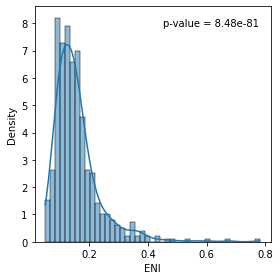

In [4]:
distplot(dataset_raw['ENI'])
save_fig('distplot_ENI.pdf')

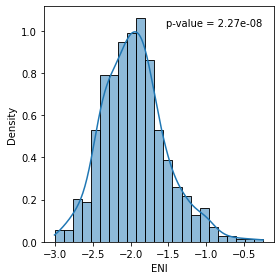

In [5]:
dataset['ENI'] = np.log(dataset_raw['ENI'])
distplot(dataset['ENI'])
save_fig('distplot_lnENI.pdf')

# POP

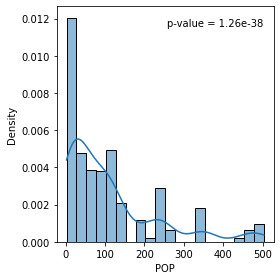

In [6]:
distplot(dataset_raw['POP'])
save_fig('distplot_POP.pdf')

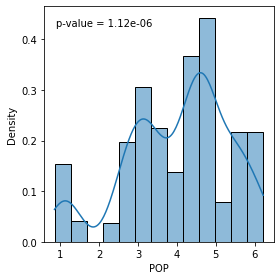

In [7]:
dataset['POP'] = np.log(dataset_raw['POP'])
distplot(dataset['POP'], align='left')
save_fig('distplot_lnPOP.pdf')

# AFL

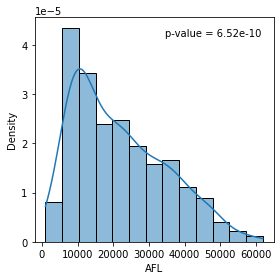

In [8]:
distplot(dataset_raw['AFL'])
save_fig('distplot_AFL.pdf')

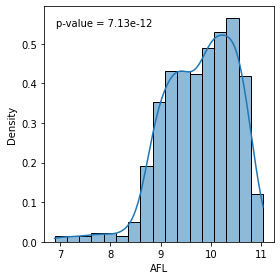

In [9]:
dataset['AFL'] = np.log(dataset_raw['AFL'])
distplot(dataset['AFL'], align='left')
save_fig('distplot_lnAFL.pdf')

# URB

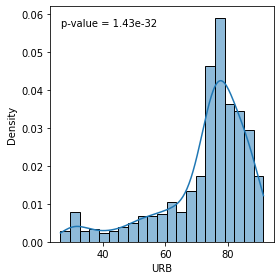

In [10]:
distplot(dataset_raw['URB'], align='left')
save_fig('distplot_URB.pdf')

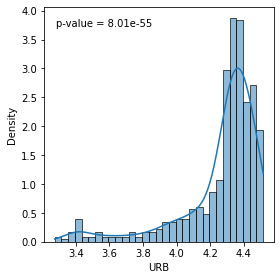

In [11]:
dataset['URB'] = np.log(dataset_raw['URB'])
distplot(dataset['URB'], align='left')
save_fig('distplot_lnURB.pdf')

# TI

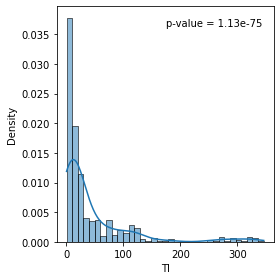

In [12]:
distplot(dataset_raw['TI'], align='right')
save_fig('distplot_TI.pdf')

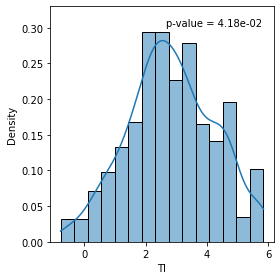

In [13]:
dataset['TI'] = np.log(dataset_raw['TI'])
distplot(dataset['TI'], align='right')
plt.ylim(0, 0.33)
save_fig('distplot_lnTI.pdf')

# TS

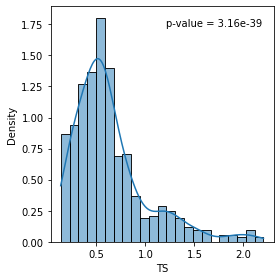

In [14]:
distplot(dataset_raw['TS'], align='right')
save_fig('distplot_TS.pdf')

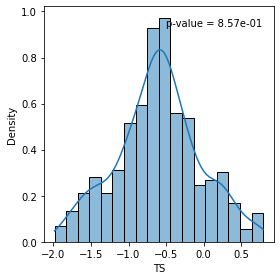

In [20]:
dataset['TS'] = np.log(dataset_raw['TS'])
distplot(dataset['TS'], align='right')
save_fig('distplot_lnTS.pdf')

# CTS

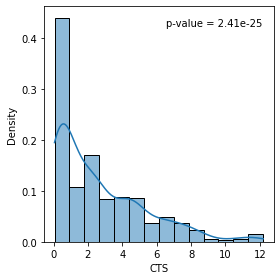

In [16]:
distplot(dataset_raw['CTS'], align='right')
save_fig('distplot_CTS.pdf')

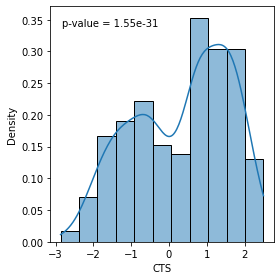

In [17]:
dataset['CTS'] = np.log(dataset_raw['CTS'])
distplot(dataset['CTS'], align='left')
save_fig('distplot_lnCTS.pdf')

# KAOPEN

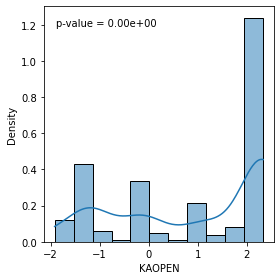

In [18]:
dataset['KAOPEN'] = dataset_raw['KAOPEN']
distplot(dataset_raw['KAOPEN'], align='left')
save_fig('distplot_KAOPEN.pdf')

In [19]:
dataset.to_csv(util.DATASET_FINAL)